In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

## BOTTLE

In [2]:
bottle = pd.read_csv("bottle.csv")

/Users/asma/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
bottle.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [5]:
bottle.describe(include=['O'])  

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-1421-06670900-0100A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [6]:
bottle.shape

(864863, 74)

### Drop the columns

In [7]:
nulls = bottle.isnull().sum().sort_values(ascending = False)
perc = round(nulls/len(bottle)*100,2)

df_null_bottle = pd.DataFrame(columns =  ['Column','Nulls','Percent'])
df_null_bottle.Column  = nulls.index
df_null_bottle.Nulls = nulls.values
df_null_bottle.Percent = perc.values
df_null_bottle.head(20)

,Column,Nulls,Percent
0,pH2,864853,100.00
1,DIC Quality Comment,864808,99.99
2,pH1,864779,99.99
3,DIC2,864639,99.97
4,TA2,864629,99.97
5,DIC1,862864,99.77
6,TA1,862779,99.76
7,C14A2p,852121,98.53
8,C14A1p,852103,98.52
9,C14As2,850449,98.33


In [8]:
#drop any column with percentage of nulls is greater than 30
for i in df_null_bottle.Column[df_null_bottle['Percent'] > 30]:
    bottle = bottle.drop([i], axis=1)
bottle.shape

(864863, 32)

In [9]:
bottle = bottle.drop(['Sta_ID', 'Depth_ID'], axis=1)

### Mean imputation with numerical values

In [10]:
# Impute the missing values with mean imputation
bottle.fillna(bottle.mean(), inplace=True)
bottle.shape

(864863, 30)

### Standardization 

In [11]:
scaler = StandardScaler()
bottle_df_scaled = pd.DataFrame(scaler.fit_transform(bottle),columns=bottle.columns)

## CAST

In [12]:
cast = pd.read_csv("cast.csv")

/Users/asma/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
cast.describe()

,Cst_Cnt,Cruise,Cruz_Sta,DbSta_ID,Quarter,Distance,Year,Month,Julian_Date,Julian_Day,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
count,34404.000000,34404.000000,3.440400e+04,3.440400e+04,34404.000000,19714.000000,34404.00000,34404.000000,34404.000000,34404.000000,...,11634.000000,32928.000000,32725.000000,19063.000000,19071.000000,18989.000000,26807.000000,9920.000000,11882.000000,9507.000000
mean,17202.500000,197406.030781,1.974061e+13,9.330342e+06,2.366556,-116.135017,1974.00218,5.835397,27017.612313,161.366236,...,6.440863,27.067602,11.135951,1016.243702,16.261989,14.414635,1.324729,5.636895,4.995624,6.803092
std,9931.723667,1974.562207,1.974557e+11,2.217993e+06,1.091894,117.282768,19.74668,3.326775,6900.075983,100.761217,...,2.295422,9.456406,6.823464,8.818816,2.728030,2.630224,1.162603,2.173354,3.106067,1.534078
min,1.000000,194903.000000,1.949030e+13,1.016800e+05,1.000000,-1920.150000,1949.00000,1.000000,17957.000000,2.000000,...,0.000000,0.000000,0.000000,101.400000,1.700000,1.800000,0.000000,0.000000,0.000000,0.000000
25%,8601.750000,195701.000000,1.957011e+13,8.100430e+06,1.000000,-169.801500,1957.00000,3.000000,20832.750000,75.000000,...,5.000000,26.000000,6.000000,1013.700000,14.400000,12.600000,1.000000,6.000000,2.000000,6.000000
50%,17202.500000,196912.000000,1.969121e+13,9.000800e+06,2.000000,-83.570000,1969.00000,6.000000,25532.000000,157.000000,...,6.000000,31.000000,10.000000,1016.300000,16.100000,14.200000,1.000000,6.000000,6.000000,7.000000
75%,25803.250000,198809.000000,1.988091e+13,1.067032e+07,3.000000,-29.470000,1988.00000,9.000000,32400.000000,247.000000,...,8.000000,33.000000,15.000000,1019.100000,17.900000,16.000000,2.000000,7.000000,8.000000,8.000000
max,34404.000000,201611.000000,2.016111e+13,1.767030e+07,4.000000,-0.141000,2016.00000,12.000000,41116.000000,354.000000,...,50.000000,37.000000,71.000000,1112.600000,43.100000,58.000000,9.000000,9.000000,9.000000,9.000000


In [14]:
cast.describe(include=['O'])  

,Cruise_ID,Cast_ID,Sta_ID,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Data_Or,Cruz_Num,Inc_Str,Inc_End,PST_LAN,Civil_T
count,34404,34404,34404,34404,34404,34080,34404,34404,32714,34404,34404,34404,18275,34404,2133,2133,2117,2116
unique,645,34404,2634,7,6466,2730,1,1,33,33,5,4190,5,380,115,200,79,181
top,1988-08-29-C-32NM,19-8809NM-CT-263-0223-10000457,090.0 045.0,ST,05/01/1987,00:00:00,N,W,RV DAVID STARR JORDAN,31JD,HY,90 45,3101,FRONTS88,12/30/1899 12:10:00,12/30/1899 18:00:00,12/30/1899 12:01:00,12/30/1899 17:47:00
freq,433,1,347,15117,30,130,34404,34404,7140,8037,21495,128,15994,433,117,48,68,32


In [15]:
cast.shape

(34404, 61)

### Drop the columns

In [16]:
nulls = cast.isnull().sum().sort_values(ascending = False)
perc = round(nulls/len(cast)*100,2)

df_null_cast = pd.DataFrame(columns =  ['Column','Nulls','Percent'])
df_null_cast.Column  = nulls.index
df_null_cast.Nulls = nulls.values
df_null_cast.Percent = perc.values
df_null_cast.head(20)

,Column,Nulls,Percent
0,Cruz_Leg,32940,95.74
1,ForelU,32327,93.96
2,Civil_T,32288,93.85
3,PST_LAN,32287,93.85
4,IntC14,32275,93.81
5,Inc_Str,32271,93.80
6,Inc_End,32271,93.80
7,TimeZone,29622,86.10
8,Secchi,29141,84.70
9,Visibility,24897,72.37


In [17]:
#drop any column with percentage of nulls is greater than 30
for i in df_null_cast.Column[df_null_cast['Percent'] > 30]:
    cast = cast.drop([i], axis=1)
cast.shape

(34404, 39)

In [18]:
categories = cast.describe(include=['O'])
categories

,Cruise_ID,Cast_ID,Sta_ID,Sta_Code,Date,Time,Lat_Hem,Lon_Hem,Ship_Name,Ship_Code,Data_Type,Orig_Sta_ID,Cruz_Num
count,34404,34404,34404,34404,34404,34080,34404,34404,32714,34404,34404,34404,34404
unique,645,34404,2634,7,6466,2730,1,1,33,33,5,4190,380
top,1988-08-29-C-32NM,19-8809NM-CT-263-0223-10000457,090.0 045.0,ST,05/01/1987,00:00:00,N,W,RV DAVID STARR JORDAN,31JD,HY,90 45,FRONTS88
freq,433,1,347,15117,30,130,34404,34404,7140,8037,21495,128,433


In [19]:
cast = cast.drop(categories.columns,axis=1)

### Mean imputation with numerical values

In [20]:
# Impute the missing values with mean imputation
cast.fillna(cast.mean(), inplace=True)
cast.shape

(34404, 26)

### Standardization 

In [21]:
scaler = StandardScaler()
cast_df_scaled = pd.DataFrame(scaler.fit_transform(cast),columns=cast.columns)

# 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 

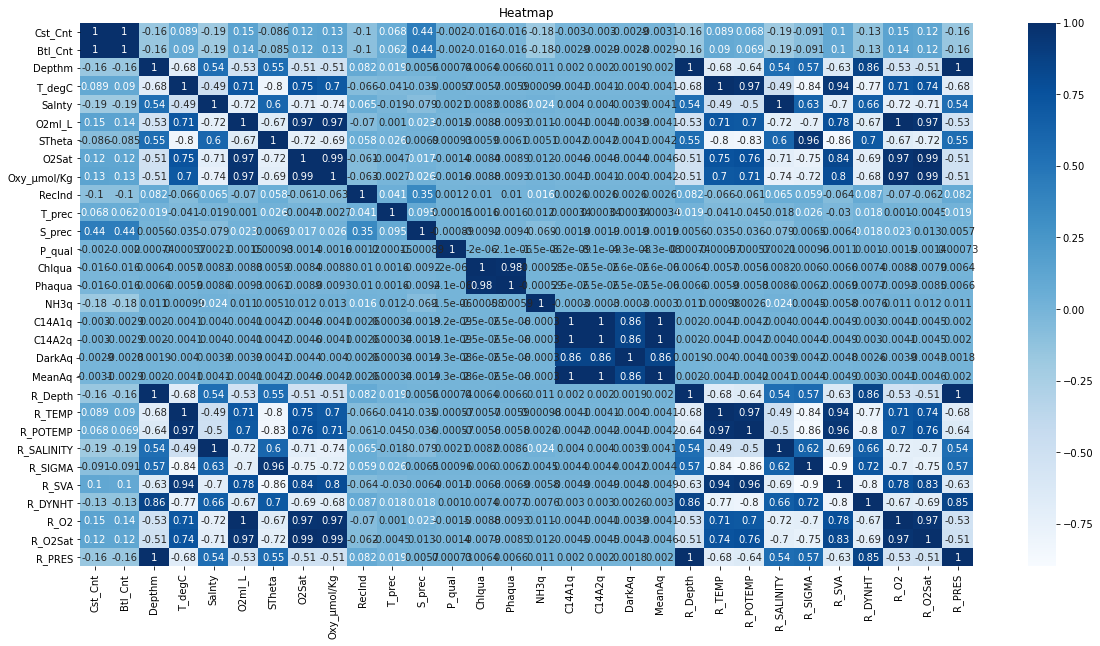

In [22]:
plt.subplots(1,1,figsize=(20,10))
sns.heatmap(bottle_df_scaled.corr(), annot=True,cmap='Blues')
plt.title("Heatmap")
plt.show()

- Water temperature has 
    strong postive correlation with R_SVA,R_POTEMP,R_TEMP
    moderate positive correlation with R_O2, R_O2Sat,O2Sat,Oxy_mol/Kg,O2ml_L
    strong negative correlation SThetha,R_DYNHT,R_SIGMA
    moderate negative correlation R_depth,Depthm, Salnty
- There's multicolinearity between c14A1q,C14A2q,DarkAq,and MeanAq  and 02Sat& Oxy_mol/Kg, Chiqua & Phaqua

# 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [25]:
#bottle.to_csv("cleaned_bottle.csv")
sal_water = pd.read_csv("cleaned_bottle.csv")
sal_water.head(5)

,Unnamed: 0,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,0,1,1,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,0
1,1,1,2,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,8
2,2,1,3,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,10
3,3,1,4,19,10.45,33.420,3.392468,25.643,57.103779,148.808694,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,19
4,4,1,5,20,10.45,33.421,3.392468,25.643,57.103779,148.808694,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,20


In [28]:
X_train, X_test, y_train, y_test = train_test_split(sal_water['Salnty'].values.reshape(-1,1), sal_water['T_degC'].values.reshape(-1,1),test_size=0.3 ,random_state=42)

regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

y_pred = regression_df.predict(X_test)
y_pred

array([[ 7.80498453],
       [ 7.25278782],
       [ 8.81274351],
       ...,
       [ 7.50587798],
       [12.30078601],
       [ 9.16706972]])

# 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics.

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

R-squared (R2) uses a scale ranging from zero to one to reflect how well the independent variables in a model explain the variability in the outcome variable. Also called the coefficient of determination, an R2 value of 0 shows that the regression model does not explain any of the variation in the outcome variable, while an R2 of 1 indicates that the model explains all of the variation in the outcome variable.

In [29]:
mean_squared_error(y_test, y_pred)

13.511463926124895

In [30]:
r2_score(y_test, y_pred)

0.23986261399262976

# 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.

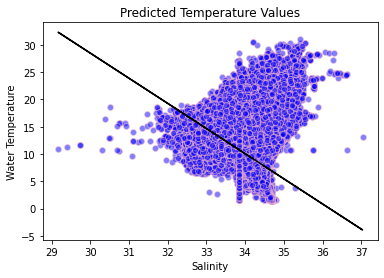

In [32]:
plt.scatter(X_test, y_test, color = 'blue', edgecolor='pink',alpha=0.5)
plt.plot(X_test, y_pred, color='black')
plt.title('Predicted Temperature Values')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
plt.show()

# 6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 

Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variable. 

In every linear regression equation to find the value of dependent variable(y) we first need to find the values of coefficient(b1, b2, …,bn) and interceptor(b0). For any values of independent variable(X), values of coefficient and interceptor will remain same. In polynomial regression we do the same so that’s why we fit the model with linear regression. The polynomial regression fits the data with interpolation.

# 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here.

In [33]:
polynomial_regression = make_pipeline(PolynomialFeatures(3), LinearRegression())
domain = np.linspace(min(bottle['Salnty'].values.reshape(-1,1)), max(bottle['Salnty'].values.reshape(-1,1)))

polynomial_regression.fit(X_train, y_train)
r = polynomial_regression.predict(domain)
y_pred = polynomial_regression.predict(X_test)
y_pred

array([[ 8.05382446],
       [ 8.12465797],
       [ 8.38686975],
       ...,
       [ 8.0677979 ],
       [12.44507682],
       [ 8.62598607]])

In [34]:
mean_squared_error(y_test, y_pred)

12.127719800509118

In [35]:
r2_score(y_test, y_pred)

0.3177102586519823

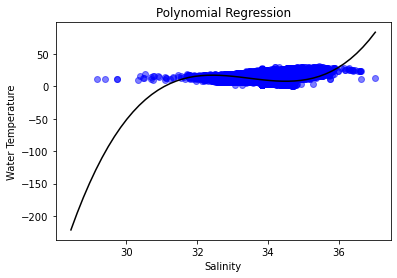

In [36]:
plt.scatter(X_test, y_test, color = 'blue',alpha=0.5)
plt.plot(domain, r, color='black')
plt.title('Polynomial Regression')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
plt.show()

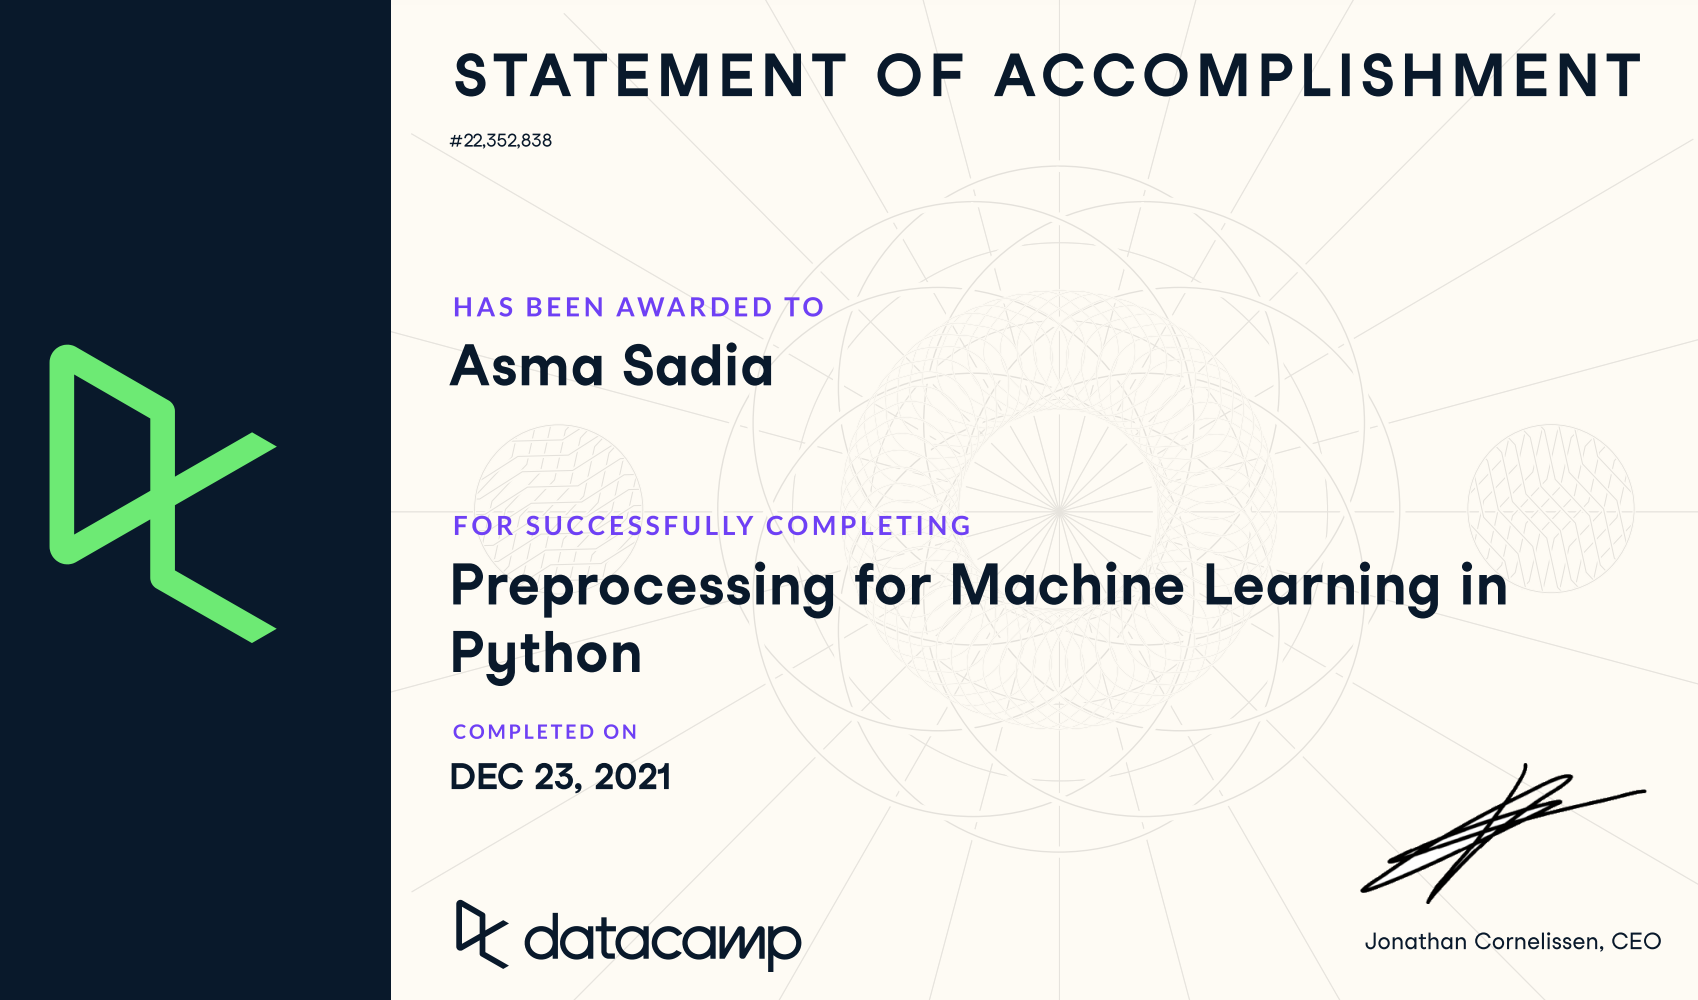

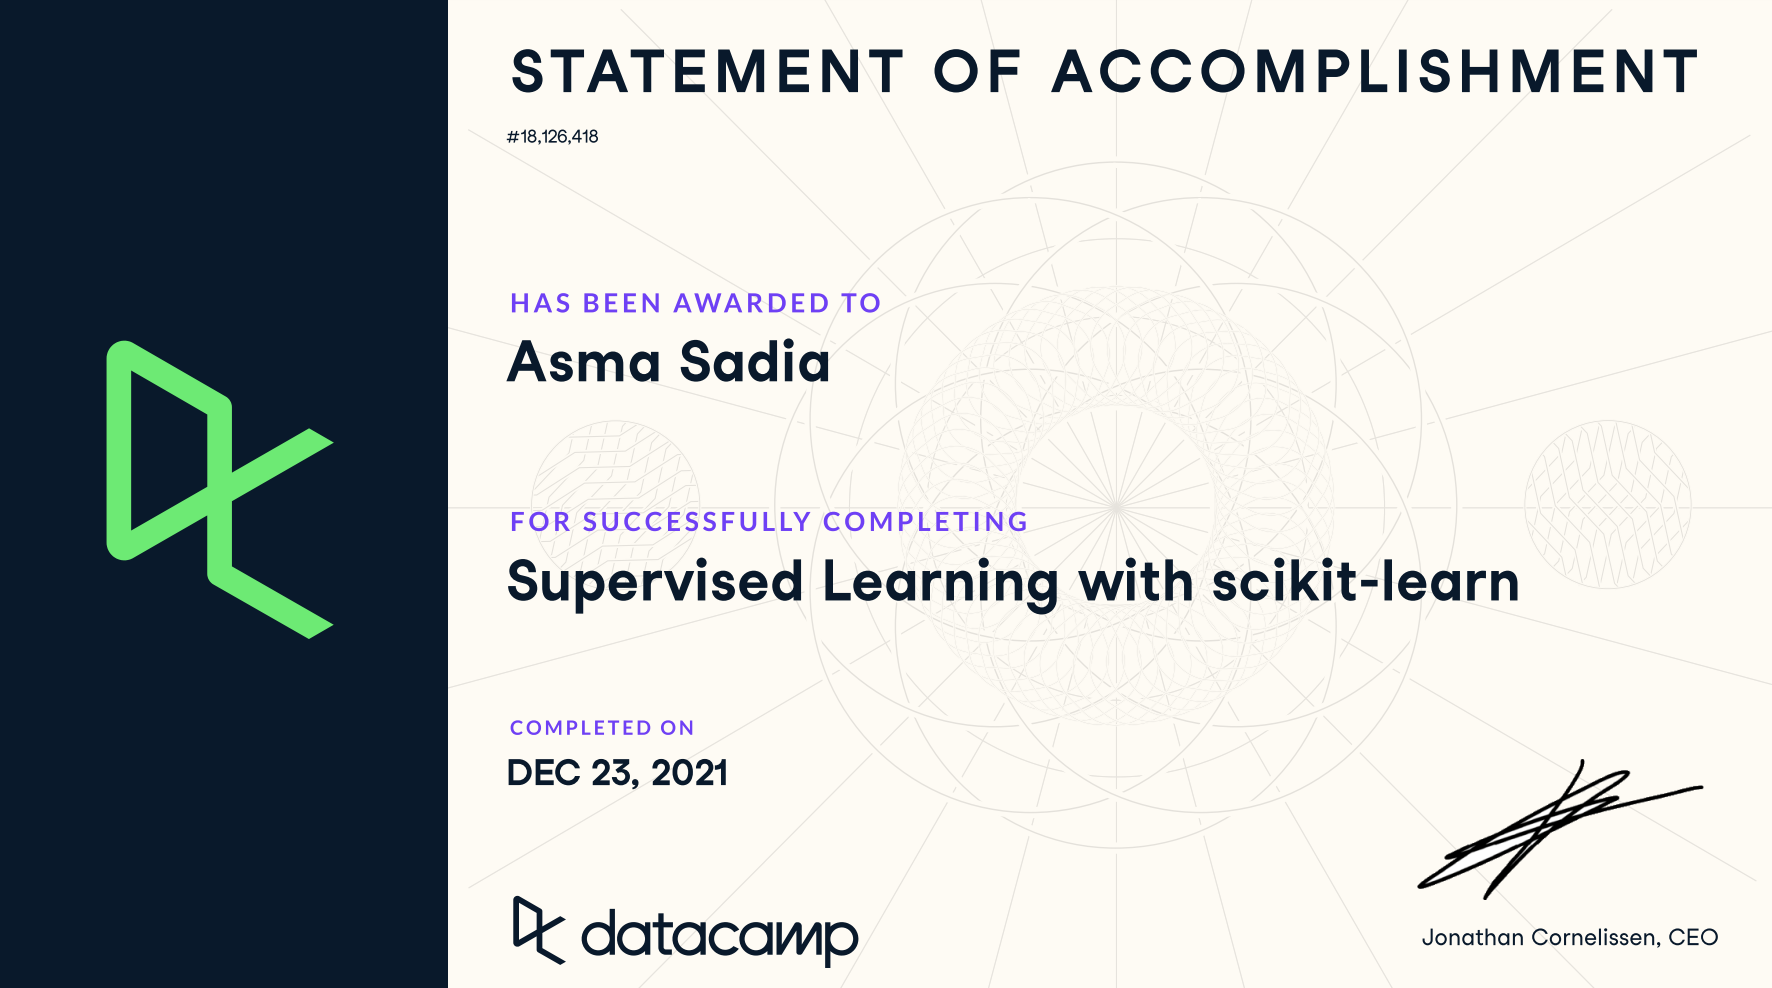